# Opplegg 3 - Tallmønstre og Geometri

I dette opplegget leker vi oss med geometri og tallmønstre som dukker opp i matematikk. Vi bruker *skilpaddegrafikk* for å tegne figurer, og gjør beregninger for å finne tall som $\pi$ og $\phi$ (det gyldne snitt).

Dette opplegget bygger på en del lik programmering som [Opplegg 1 (Tilfeldige Tall og Simuleringer)](Opplegg 1 - Tilfeldige Tall og Simuleringer.ipynb), og vi gjentar ikke alt her. Det lønner seg derfor å først skumme igjennom det andre opplegget, og så denne.

**Plan** 

Dette opplegget er delt i tre hovedbolker. Først ser på skilpaddegrafikk, og hvordan vi kan bruke dette til å tegne enkle geometriske figurer som regulære mangekanter. Dette gir en god diskusjon av geometriske former, vinkler, og lignende. Man må se mønstrene i formene for å kunne skrive koden som generer dem. Deretter snur vi til å beregne $\pi$ ved å gjennomføre et digitalt eksperiment. Til slutt går vi inn på Fibonnacitall, hvor vi ser hvordan vi kan beregne dem ved hjelp av datamaskin, og hvorfor de er spennende.

**Kompetansemål**
* **Matematikk**
    1. Beskrive, forklare og presentere strukturer og forandringer i geometriske mønstre og tallmønstre
    2. Bruke faktorar, potensar, kvadratrøter og primtal i berekningar
    3. Utforske, eksperimentere med og formulere logiske resonnement ved hjelp av geometriske idear og gjere greie for geometriske forhold som har særleg mykje å seie i teknologi, kunst og arkitektur
    4. Gjere greie for talet π og bruke det i berekningar av omkrins, areal og volum
    5. Finne og diskutere sannsyn gjennom eksperimentering, simulering og berekning i dagligdagse samanhengar og spel


# Skilpaddegrafikk



I 1970 lagde MIT en robot for å hjelpe barn å lære programmering. Roboten kunne programmeres til å kjøre rundt ved hjelp av et programmeringsspråk som heter logo. På robotens underside kunne man feste en tusj, slik at den tegnet en strek der den kjørte, og på den måten kunne man tegne en tegning ved hjelp av kode. Disse robotene ble kalt for "floor turtles", eller bare "turtles". Et år senere ble Logo oppdatert til også å kunne tegne grafikk på dataskjermen, ved å bruke samme kommandoer som man brukte til å styre robotskilpadden. Dette er kjent som *turtle graphics*, eller skilpaddegrafikk på norsk.

En tidlig "floor turtle" fra MIT. Det finnes mange forskjellige modeller, med forskjellig utseende. 
<img src="http://mstatic.mit.edu/nom150/items/2007.019.001.jpg" width=200>
(Kilde: [MIT Museum](http://museum.mit.edu/nom150/entries/1158))

Skilpaddegrafikk har blitt en meget populær måte å lære programmering og leke seg med stoffet, de fleste moderne programmeringsspråk støtter derfor skilpaddegrafikk - dette inkluderer scratch. I Python er det også laget en pakke for å kunne drive med skilpaddegrafikk, og denne heter passende nok `turtle`. La oss bruke `turtle`-pakken til å tegne litt forskjellige geometriske figurer.

### Lage skilpadder

En skilpadde er et eget *objekt* i Python, så vi må først opprette en *skilpaddevariabel* på samme måte som vi har laget andre variabler før. Dette gjør vi som følger

In [1]:
import turtle

arthur = turtle.Turtle()

Her importerer vi først skilpaddepakken `turtle`. Deretter opretter vi en skilpaddevariabel ved å bruke `turtle.Turtle()`. Vi kaller denne for `arthur`, inspirert av bildet over.

Når vi kjører koden skal det dukke opp et nytt vindu. Her er alt hvitt, mens vi ser en liten svart pil i midten. Denne pilen er Arthur, skilpadden vår. For nå står den helt stille, for vi har ikke gitt den noen kommandoer enda.

Det kan være litt vanskelig å se skilpadden fordi den er så liten, så la oss gjøre den litt større. Kanskje man også vil at det skal se ut som en ekte skilpadde og ikke en pil, så det kan vi også gjøre

In [2]:
arthur.shape('turtle')
arthur.shapesize(3)

Her er `arthur.shape()` et slags funksjonskall, men funksjonen vi kaller hører til `arthur`-objektet vårt og vil derfor påvirke `arthur`. Slike funksjoner kalles *metoder* ("methdos") i Python. La oss se på hvordan vi kan flytte Arthur rundt på arket sitt.

Arthur flyttes rundt med spesifikke metoder, den første vi bruker er `forward(100)`. Her er tallet antall steg Arthur skal gå. Enheten er ganske liten, så vi begynner med 100

In [3]:
arthur.forward(100)

Når Arthur går fremover tegner han en strek på bakken der han har gått. Arthur kan også gå baklengs med `backward(100)`. Vi kan se at han går på skjermen, og vi kan justere hastigheten med `arthur.speed()`, her er 1 den laveste hastigheten, og 11 eller høyere det raskeste. La oss sette den til minimum så vi ser Arthur i bevegelse

In [4]:
arthur.speed(1)
arthur.forward(100)

For å svinge bruker vi `left` og `right` som vrir Arthur et visst antall grader til venstre eller høyre. Arthur vrir på stedet, så `left` og `right` vil ikke flytte på hvor skilpadden befinner seg

In [5]:
arthur.left(90)

Nå som skilpadden har vridd seg til venstre kan vi gå fremover igjen

In [6]:
arthur.forward(200)

Vi kan nå for eksempel lage en firkant ved å gjenta denne operasjonen

In [7]:
arthur.left(90)
arthur.forward(200)
arthur.left(90)
arthur.forward(200)

Vi kan nå lage en funksjon som får Arthur til å tegne en firkant

In [8]:
def firkant(bredde):
    arthur.forward(bredde)
    arthur.left(90)
    arthur.forward(bredde)
    arthur.left(90)
    arthur.forward(bredde)
    arthur.left(90)
    arthur.forward(bredde)
    arthur.left(90)
    
firkant(400)

Merk at vi legger til en siste `left(90)`, sånn at skilpadden ender opp i samme vinkel som den begynte. 

Denne funksjonen gjør jobben, men den er ikke særlig elegant, for vi bare gjentar kode mange ganger. Når man gjentar kode er det tegn på at man kanskje vil bruke en løkke

In [9]:
def firkant(bredde):
    for kant in range(4):
        arthur.forward(bredde)
        arthur.left(90)
        
firkant(300)

En annen ting vi kan forbedre er at funksjonen vi har skrevet krever at skilpaddevariabelen vår heter `arthur`, dette er ikke særlig feksibelt (dette kalles for "hardkoding"). Men hvordan kan vi ellers gjøre det? Vel, la oss si vi ønsker å kalle på funksjonen på denne måten: `firkant(arthur, 200)` som betyr at `arthur` skal tegne en firkant

In [10]:
def firkant(skilpadde, bredde):
    for kan in range(4):
        skilpadde.forward(bredde)
        skilpadde.left(90)
        
firkant(arthur, 200)

Det er fint at `firkant` funksjonen nå kan brukes på alle skilpaddvariabler, for kanskje vi har lyst å lage flere skilpadder på samme ark, dette kan enkelt gjøres som følger

In [11]:
benedicte = turtle.Turtle()
benedicte.shape('turtle')
benedicte.shapesize(3)
benedicte.speed(1)
benedicte.color('red')

Nå har vi laget en til skilpadde. Vi har brukt `color` til å gjøre Benedicte rød, så vi lettere kan skille på de to skilpaddene våre, dette påvirker både skilpadden og pennen. Vi kan nå bruke `firkant` på enten Arthur, eller Benedicte

In [12]:
firkant(benedicte, 400)

**Eksempeloppgave:** Hvordan kan du bruke `firkant`-funksjonen til å tegne en firkant på skrå?

**Fasit:** Funksjonen begynner med å gå rett frem, så om vi starter med en skilpadde vinklet på skrå blir automatisk firkanten også det.

In [13]:
benedicte.left(45)
firkant(benedicte, 200)

**Eksempeloppgave:** `firkant`-funksjonen vi har laget tegner bare kvadrater. Lag en  funksjon som tegner et rektangel. Kall funksjonen din: `rektangel(skilpadde, bredde, høyde)`

**Fasit:**

In [14]:
def rektangel(skilpadde, bredde, høyde):
    for i in range(2):
        skilpadde.forward(bredde)
        skilpadde.left(90)
        skilpadde.forward(høyde)
        skilpadde.left(90)
        
rektangel(arthur, 100, 200)

### Tegne Mangekanter

Nå som vi har sett hvordan vi kan bruke skilpaddegrafikk til å tegne firkanter, la oss prøve å tegne andre regulære mangekanter (regulære betyr at alle vinklene er like store og alle sidene like lange, som for eksempel et kvadrat.

La oss først nullstille tegneflaten. Vi kan nå enten lukke hele vinduet ved å bruke `turtle.bye()` og deretter lage en ny skilpadde. Eller så kan vi sende skilpaddene "hjem" ved hjelp av `home`, og så bruke `clear` for å tømme skjermen

In [15]:
for skilpadde in [arthur, benedicte]:
    skilpadde.home()
    skilpadde.clear()

#### Trekant

La oss nå tegne en trekant. For at skilpadden skal ende samme sted som den begynner etter å ha tegnet de tre kantene må vi vite hvor mange grader den skal snu i hvert hjørne. En likesidet trekant har 60 grader i hver vinkel, så la oss prøve det:

In [16]:
def trekant(skilpadde, bredde):
    for kant in range(3):
        skilpadde.forward(bredde)
        skilpadde.left(60)
        
trekant(arthur, 200)

Ops! Det gikk ikke helt som forventet. Hva var det som skjedde? Når skilpadden snur 60 grader og så fortsetter, ser vi at den tegner en vinkel på faktisk 120 grader! Om skilpadden ikke snur i det heletatt og beveger seg videre er det jo litt som at den lager en vinkel med 180 grader, så vi ser at vinkelen som blir laget er $180 - x$, der $x$ er antall grader vi ber skilpadden snu. (Tegn en liten figur, så ser du dette litt tydligere). 

Så i trekantfunksjonen vår vil vi at skilpadden skal lage en vinkel på 60, så da må vi be den snu 120 grader siden $180 - 120 = 60$. Da får vi:

In [17]:
def trekant(skilpadde, bredde):
    for kant in range(3):
        skilpadde.forward(bredde)
        skilpadde.left(120)
        
trekant(benedicte, 200)

Der satt den! 

Istedet for å tenke masse på hvor mye skilpadden skal snu hver gang, så kan vi også bare tenke at etter hele figuren er tegnet, så skal skilpadden være tilbake der den startet *og peke samme retning*, det betyr at skilpadden må ha rotert 360 grader totalt mens den lagde figuren. Så uansett hvilken mangekant vi ønsker å tegne, så vil skilpadden snu $360/n$ grader, der $n$ er antall kanter i figuren. 

Vi ser at denne formelen fungerer for trekant: $360/3 = 120$ og firkant: $360/4 = 90$. La oss prøve den på en femkant.

#### Femkant

Nå skal vi prøve å tegne en femkant. Da må skilpadden vår snu seg $360/5 = 72$ grader for hver kant. Da får vi følgende funksjon: 

In [18]:
def femkant(skilpadde, bredde):
    for kant in range(5):
        skilpadde.forward(bredde)
        skilpadde.left(72)

arthur.home()
arthur.clear()
femkant(arthur, 300)

**Eksempeloppgave:** Nå er det din tur til å prøve. Lag en funksjon som tegner sekskanter.

**Fasit:**

In [19]:
def sekskant(skilpadde, bredde):
    for kant in range(6):
        skilpadde.forward(bredde)
        skilpadde.left(60)

sekskant(benedicte, 150)

**Eksempeloppgave:** Lag en funksjon som tegner en regulær mangekant hvor man kan sende inn antall kanter. Kall funksjonen din `mangekant(skilpadde, n, bredde)`, der `n` er antall kanter.

**Fasit:**

In [20]:
def mangekant(skilpadde, n, bredde):
    for i in range(n):
        skilpadde.forward(bredde)
        skilpadde.left(360/n)
        
mangekant(arthur, 8, 100)

Nå som vi har tegnet forskjellige mangekanter kan vi bruke litt tid til å tenke på vinklene. I en trekant har vi tre vinkler på 60 grader, som til sammen blir 180 grader. I en firkant har vi fire vinkler på 90 grader, som blir 360 grader. I en femkant har vi fem vinkler, hver på 108 grader, som blir 540 grader. Og i en sekskant har vi 6 vinkler på 120 grader, som blir totalt 720 grader.

Vi ser at vinklene i figurene blir litt større hver gang, og vi får en vinkel mer, dette gjør at det totale antall grader i figuren øker med 180 hver gang vi legger til en til kant. Er ikke det litt rart?

<img src="fig/mangekanter.png" width=700></img>

**Eksempeloppgave:** Hvis du har fått til å lage en funksjon, prøv å bruk funksjonen din til å tegne noe som ligner på en sirkel!

**Fasit:**

In [21]:
mangekant(benedicte, 20, 30)

En regulær mangekant vil begynne å ligne på en sirkel når det får veldig mange kanter. Men det er litt slitsomt å bruke mangekanter på denne måten, så skilpaddene har faktisk en innebygd `circle` metode, som tegner en "perfekt" sirkel med en gitt radius.

In [22]:
arthur.circle(200)

In [23]:
for skilpadde in [arthur, benedicte]:
    skilpadde.home()
    skilpadde.clear()

Vi kan også bruke `circle` til å tegne halvsirkler, eller korte sirkelbuer. Da sender vi bare inn antall grader som skal tegnes som et til argument

In [24]:
arthur.circle(200, 90)

Merk at circle til vanlig alltid går mot klokka, om vi ønsker å gå med klokka sender vi inn radiusen som et negativt tall. Om vi sender inn antall grader som et negativt tall går skilpadden baklengs i en sirkel.

In [25]:
benedicte.circle(-200, 90)

Vi kan bruke dette til å lage spiraler. Om vi bruker `circle` til å gå litt og litt av en sirkel, men øker radien litt og litt, får vi en spiral som går utover.

In [26]:
for skilpadde in [arthur, benedicte]:
    skilpadde.home()
    skilpadde.clear()
    
for i in range(72):
    arthur.circle(5*i, 10)

### Kunst

Vi har sett hvordan vi kan lage regulære mangekanter ved å passe på at antall grader i hver vinkel er akkurat riktig for at skilpadden skal ende opp akkurat der den startet. Men om vi velger "feil" antall grader og gjentar prosessen mange ganger får vi et stilig mønster. La oss prøve

In [27]:
# Setter opp farten, så det går litt fortere
arthur.speed(5)

In [28]:
for skilpadde in [arthur, benedicte]:
    skilpadde.home()
    skilpadde.clear()

for i in range(36):
    arthur.forward(200)
    arthur.left(56)

Vi kan også gjøre andre ting for å lage kule mønstre, vi kan for eksempel tegne mange firkanter, med litt forskjellig vinkel

In [29]:
for skilpadde in [arthur, benedicte]:
    skilpadde.home()
    skilpadde.clear()

for i in range(36):
    arthur.left(10)
    firkant(arthur, 200)

Dette er bare begynnelsen av hva man kan begynne å lage med skilpaddegrafikk og her er det bare å leke seg. Det finnes mange eksempler og ressurser man kan bruke på nett for inspirasjon. Her kan vi spesielt anbefale å ta en titt på [Kids Koder sine Python oppgaver](http://oppgaver.kidsakoder.no/python/index.html), hvor det er en del skilpaddeoppgaver. De mest kompliserte av disse går ut på å tegne fraktaler ved hjelp av skilpaddegrafikk. 

Her er et Koch snøflak, en type fraktal man kan forholdsvis enkelt tegne med skilpaddegrafikk
<img src="http://oppgaver.kidsakoder.no/python/skilpaddefraktaler/skilpaddefraktaler.png" width=300>
(Kilde: [Kidsa Koder](http://oppgaver.kidsakoder.no/python/skilpaddefraktaler/skilpaddefraktaler.html))

Lenger nede skal vi diskutere Fibonaccirekka litt, og vi trekker inn litt skilpaddegrafikk der. Ellers lar vi det ligge for nå. Derfor lukker vi skilpaddevinduet vårt.

In [30]:
turtle.bye()

# Kaste dart for å finne $\pi$ 

De fleste vet nok at $\pi \approx 3.14$, men la oss si vi har glemt dette fullstending. Eller at vi ønsker å finne flere desimaler av $\pi$, hvordan kan vi gjøre dette? Vi skal nå ta en nærmere titt på hvordan vi kan kjøre et eksperiment for å finne tallet $\pi$. Tallet $\pi$ er jo meget viktig i geometri, og det har mange spennende egenskaper, som for eksempel at det er irrasjonelt, som betyr at det har uendelig mange desimaltall som aldri gjentar seg selv.

Eksperimentet vi skal gjøre for å finne $\pi$ er å kaste dartpiler på en blink. Hvis vi antar at vi ikke er så flinke til å kaste, så kan vi si at dartpilene vil havne tilfeldige steder på blinken. Vi kan da telle antallet dartpiler som treffer blinken, og antallet som bommer på blinken, for å estimere $\pi$.

Anta at vi har skrevet ut blinken vår på et stort ark og klippet det til et kvadrat. På kvadratet er blinken tegnet inn som en stor sirkel. Sirkelen har en radius på 1, og kvadratet har sider på lengde 2. Det meste av arket er altså dekket av sirkelen, men hjørnene regnes som "bom".



<img src="fig/dartskive.png" width=250>

Hvis vi antar at hver dartpil havner et helt tilfeldig sted på hele arket, så vil sannsynligheten for å treffe innenfor sirkelen være gitt ved arealet av sirkelen. Vi kan bruke formelen
$$\frac{\text{Antall treff}}{\text {Antall kast}} = \frac{\text{Areal av dartksive}}{\text{Totalt Areal}}$$

Arealet av sirkelen er gitt ved formelen $A = \pi r^2$. Siden radiusen er 1 blir arealet til sirkelen bare $\pi$. Firkanten har sider på lengde 2, så arealet til firkanten blir $2*2=4$. Da vet vi at
$$\frac{\text{Antall treff}}{\text {Antall kast}} = \frac{\pi}{4}.$$
Det vi ønsker å gjøre nå er løse denne ligningen for vår ukjente, som i dette tilfellet er $\pi$. Hvis vi ganger med 4 på begge sider av likhetstegnet får vi nå
$$\pi = 4\cdot \frac{\text{Antall treff}}{\text {Antall kast}}.$$
Så hvis vi kaster masse darts helt tilfeldig på dartskiva, så kan vi telle antallet som treffer innenfor skiva, og bruke denne formelen til å regne oss frem til $\pi$.


### Å kaste dart for hånd

I youtube videoen under gjør to personer dette eksperimentet i virkeligheten, og de finner ut at det er litt vanskelig. For det første ønsker vi å kaste flest mulig piler, for jo fler piler vi kaster, jo fler desimaler får vi (dette garanteres av store talls lov). Men det å kaste tusenvis av piler kan fort bli slitsomt. I tillegg er vi faktisk litt *for flinke* til å kaste, og det er veldig viktig for at eksperimentet at vi kaster tilfeldig. Samtidig må vi også ignorere alle piler som havner utenfor blinken! I videoen ender de opp med å designe en litt mer komplisert blink, og snur denne baklengs, slik at de ikke ser den. På den måten kaster de i blinde, og litt mer tilfeldig - dette forbedrer eksperimentet, og de kommer til slutt frem til et bra estimat.

In [31]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/M34TO71SKGk" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

Link til videoen: https://www.youtube.com/watch?v=M34TO71SKGk

### Å kaste dart på datamaskin

Det kan være lurt å kaste dart for hånd og estimere $\pi$ for å få en bedre følelse for eksperimentet og se hvor nærme vi kommer. Deretter kan vi gjøre det i Python. Fordelen er nå at vi kan kaste veldig mange flere piler uten problemer. Samtidig er Python langt bedre på å kaste tilfeldig enn oss mennesker, og vi kan være sikre på at dartpilene faktisk havner et helt tilfeldig sted på blinken (om vi programmerer riktig hvertfall!).

In [32]:
from pylab import *

Å kaste en dartpil i programmet vårt er det samme som å finne ut hvor den havner på blinken. Det vil si at vi ønsker å finne koordinatene $(x, y)$. Hvis vi ser på figuren vår over ser vi at koordinatsystemet vårt går fra -1 til 1 for begge disse koordinatene. Siden vi vil at det skal være like sannsynlig at pilen havner på hele blinken ønsker vi å trekke *uniformt*-fordelte tall. I opplegg #1 lærte vi at dette kan gjøres med funksjonen `uniform` som følger

In [33]:
x = uniform(-1, 1)
y = uniform(-1, 1)
print(x, y)

-0.2337300012738086 0.9175863360392498


Her får vi koordinatene av hvor pilen havnet. Det er kanskje litt lite håndfast. La oss tegne opp blinken og pilkastene for å se hvordan det ser ut. Vi lager først en funksjon for å tegne det tomme blinken. Denne funksjonen er noe komplisert. Først bruker vi parameterfremstilling for å tegne sirkelen, deretter tegner vi en firkant. Til slutt bruker vi `axis('equal')` og `axis('none')` for å sørge for at blinken vises kvadratisk, og at vi ikke tegner på aksene.

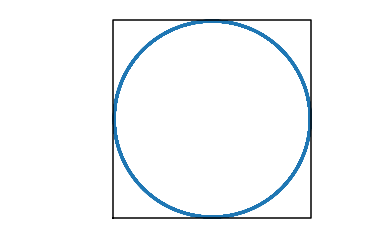

In [34]:
def tegn_blink():
    theta = linspace(0, 360, 1001)
    plot(cos(theta), sin(theta))
    plot((-1, -1, 1, 1, -1), (-1, 1, 1, -1, -1), color='black')
    axis('equal')
    axis('off')
    
    
tegn_blink()
show()

Og nå kan vi kaste et par piler på blinken og se hvor de havner

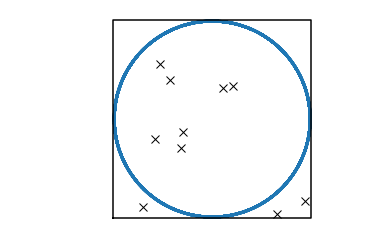

In [35]:
tegn_blink()

for kast in range(10):
    x = uniform(-1, 1)
    y = uniform(-1, 1)
    plot(x, y, 'x', color='black', markersize=8)
 
show()

Vi får nå kryss der dartpilene har truffet. Nå klarer vi jo å se om vi har truffet eller ikke. Men det blir slitsomt om vi skal telle alle treffene og bommene selv, spesielt om vi har tusenvis av kryss! Så hvordan kan vi få datamaskinen til selv å sjekke om den har truffet eller ikke? Her må vi tenke geometrisk. Sirkelen har sentrum i 0 og radius 1. Om avstanden fra der dartpilen traff til sentrum er 1 eller mindre har vi altså truffet blinkskiva, om avstanden er større enn 1 så må vi ha bommet. Hvordan regner vi ut avstanden fra dartpilen til sentrum? Vi kan tegne opp denne avstanden som en rettvinklet trekant, der avstanden er hypotenusen og de to katetene er $x$ og $y$. Altså kan vi bruke Pytagoras til å finne avstanden, og en if-test for å si om vi traff eller ikke:

In [36]:
x = uniform(-1, 1)
y = uniform(-1, 1)
print(x, y)

avstand = sqrt(x**2 + y**2)
print(avstand)

if avstand <= 1:
    print("Treff!")
else:
    print("Bom!")

-0.04143053283318032 -0.45323174125050936
0.45512141273270135
Treff!


Vi kan også tegne en ny blink, der vi farger kryssene grønn om vi har treff, og røde om vi har bom, for å sjekke at vi har programmert riktig

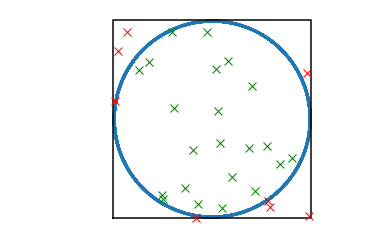

In [37]:
tegn_blink()

for kast in range(30):
    x = uniform(-1, 1)
    y = uniform(-1, 1)
    
    avstand = sqrt(x**2 + y**2)
    
    if avstand <= 1:
        plot(x, y, 'x', color='green', markersize=8)
    else:
        plot(x, y, 'x', color='red', markersize=8)
        
show()

Da er vi klare for å faktisk estimere $\pi$. Denne ganger bruker vi igjen en løkke for å kaste mange piler, men istedet for å tegne dem inn på blinken, bruker vi tellevariabler for å holde tellingen på antall treff og bom

In [38]:
antall_kast = 1000

treff = 0
bom = 0

for i in range(antall_kast):
    x = uniform(-1, 1)
    y = uniform(-1, 1)
    d = sqrt((x**2 + y**2))
    
    if d <= 1:
        treff += 1
    else:
        bom += 1

print("Treff:", treff)
print("Bom:  ", bom)

Treff: 783
Bom:   217


Vi kaster nå tusen piler og ser hvor mange som treffer og bommer. For å finne $\pi$ fra dette må vi plugge inn resultatene våre i formelen vi fant tidligere

In [39]:
pi = 4*treff/antall_kast
print("Pi:", pi)

Pi: 3.132


Hvor nærme $\pi$ var vi egentlig? La oss lage en funksjon som estimerer $\pi$, så vi kan kjøre den et par ganger og se hvor nærme vi kommer i hvert tilfelle.

In [40]:
def estimate_pi(antall_kast):
    treff = 0

    for i in range(antall_kast):
        x = uniform(-1, 1)
        y = uniform(-1, 1)
        avstand = sqrt(x**2 + y**2)
        if avstand <= 1:
            treff += 1 
            
    pi = 4*treff/antall_kast
    return pi

La oss se hvor nærme vi kommer når vi kaster bare 10 piler

In [41]:
print(estimate_pi(10))
print(estimate_pi(10))
print(estimate_pi(10))

3.2
3.6
2.4


Her treffer vi ikke særlig bra. Merk at siden vi kaster akkurat 10 piler, så vil uttrykket "antall treff/antall kast" alltid være 0.1, 0.2, 0.3, osv, så når vi ganger med 4 får vi 0.4, 0.8, 1.2 osv. Så det nærmeste $\pi$ vi kan komme med 10 kast er altså 3.2! Det er ikke bra nok, la oss prøve med 1000 kast

In [42]:
print(estimate_pi(1000))
print(estimate_pi(1000))
print(estimate_pi(1000))

3.088
3.18
3.184


Nå er vi litt nærmere. La oss gå til en million

In [43]:
print(estimate_pi(1000000))
print(estimate_pi(1000000))
print(estimate_pi(1000000))

3.141908
3.14266
3.141728


En million kast er altså bra nok for å få 3.14, men $\pi$ har uendelig desimaler, og det fortsetter $3.14159265...$. Vi kunne økt til enda flere kast og fått fler og fler desimaler i svaret vårt, men dette kan fort ta en stund. Prinsippet er derimot at jo lenger datamaskinen får jobbe, jo flere desimaler finner vi av $\pi$. 

I praksis bruker ikke matematikere denne metoden for å finne $\pi$, men de bruker lignende teknikker for å få datamaskiner til å regne fler og fler desimaler av pi. Jo lenger maskinene får kjøre, jo fler desimaler får vi ut. Det er konkuranser blant matematikere å regne ut flest desimaler, og rekorden er nå på 2.7 tusen milliarder desimaler! Så kan man jo lure på hvorfor man trenger å vite så mange desimaler av $\pi$, og svaret der er at det strengt tatt ikke er så veldig spennende. Noen forsker på tallmønstre i $\pi$, og for dem er det ganske spennende, men det brukes nok ikke til mye mer enn det. Derimot syns matematikere gjerne sånne problemer er morsomme for det, og det er en viss ære i å finne nye og bedre måter å regne ut $\pi$ på, samtidig er det en god måte å teste hvor rask en datamaskin er på.

#### Plotte Konvergens mot $\pi$

Det at vi kommer nærmere og nærmere $\pi$ kaller vi *konvergens*. La oss tegne opp hvor nærme vi kommer over tid

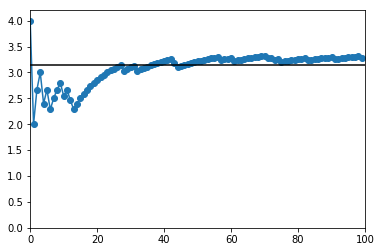

In [44]:
antall_kast = 100
treff = 0
pi = []

for i in range(antall_kast):
    x = uniform(-1, 1)
    y = uniform(-1, 1)
    avstand = sqrt(x**2 + y**2)

    if avstand <= 1:
            treff += 1 
            
    pi.append(4*treff/(i+1))
    
plot(pi, 'o-')
axhline(3.1415, color='black')
axis((0, antall_kast, 0, 4.2))
show()

Siden denne estimeringen av $\pi$ bygger på tilfeldighet ser vi at estimatet vårt gjerne kan skyte over og under $\pi$, men på grunn av store talls lov ser vi at den etterhvert begynner å flate ut. La oss tegne på nytt, men med en million kast. Nå lar vi y-aksen gå fra 3.1 til 3.2.

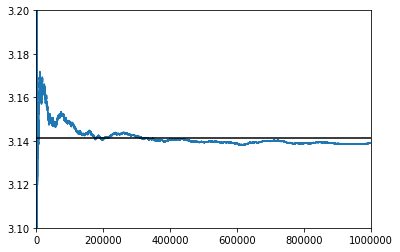

In [45]:
antall_kast = 1000000
treff = 0
pi = []

for i in range(antall_kast):
    x = uniform(-1, 1)
    y = uniform(-1, 1)
    avstand = sqrt(x**2 + y**2)

    if avstand <= 1:
            treff += 1 
            
    pi.append(4*treff/(i+1))
    
plot(pi)
axhline(3.1415, color='black')
axis((0, antall_kast, 3.1, 3.2))
show()

### Buffon's Nål

Et alternativ til å kaste dart for å finne $\pi$ er Buffon's nåleksperiment. For å gjøre eksperimentet trenger man et stort ark og en haug med nåler (her er det mer praktisk å bruke tannpirkere eller fyrstikker). På arket tegner man parallelle rette linjer, der avstandene mellom linjene skal være nøyaktig 2 ganger lengden på nålene/fyrstikkene. Om man kaster fyrstikkene så de er tilfeldig spredt utover arket, kan man nå tellet antallet som krysser noen av linjene, og antaller som ikke kryser linjene. Formelen for å finne $\pi$ er nå
$$\pi = \frac{\text{antall fyrstikker}}{\text{antall som krysser en linje}}.$$

<img src="fig/buffon.png" width=400></img>

Det er litt vanskligere å forklare hvorfor Buffon's nåleksperiment handler om $\pi$ ved hjelp av ungdomsskolematematikk, ettersom at det krever cosinus og sinus. Det er også litt vanskligere å programmere det av samme grunn. Men det kan være stilig å gjennomføre i klasserommet.

In [4]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/sJVivjuMfWA?rel=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

Link til videon: https://www.youtube.com/watch?v=sJVivjuMfWA

# Det Gyldne Snitt og Fibonaccirekka

Vi går nå fra å se på $\pi$ (pi) til et annet viktig geometrisk tall: $\phi$ (phi). Det er ikke like mange som kjenner til $\phi$ som $\pi$, men det er litt fordi det er bedre kjent under et kallenavn: det gylne snitt. Det gyldne snitt er et tall vi finner mye i naturen, men også i design - for det regnes som veldig vakkert.

Kort fortalt kan man forklare det gyldne snitt ved å tegne et rektangel. Hvis vi sier at $a$ er høyden på rektangelet, så sier vi at bredden er $a+b$. Det gyldne snitt er det vi trenger hvis vi vil at forholdet mellom sidene skal være det samme som forholdene $a$ og $b$.
<img src="fig/gyldne_snitt.png" width=500></img>
Dette er altså en fin balanse mellom lengdene $a$ og $b$, og det kalles gjerne for en *harmonisk* deling.

Vi skal se hvordan vi kan regne ut $\phi$, om vi ikke kjenner til hva den er, på samme måte som vi regnet ut $\pi$. Men før vi gjør det trenger vi å se på Fibonaccirekka.



### Fibonaccirekka


Den følgende tallrekka er ganske berømt
$$1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ...$$
Den kalles Fibonaccirekka, eller bare for Fibonaccitallene. Rekka lages ved at hvert nye tall i rekken er summen av de to foregående. Med denne definisjonen er det forholdsvis enkelt å regne seg videre oppover i rekka, men tallene blir fort ganske store. 

La oss lage et program som regner seg oppover i rekka og skriver ut tallene. La oss først prøve å skrive ut de 10 første tallene i rekka. Dette gjør vi ved å bruke variables som husker de to foregående tallene. Vi kan kalle disse `forrige` og `fforrige`, der "ff" i "fforrige" står for "forrige-forrige". For hvert tall i rekka må vi legge sammen disse to variablene, skrive ut resultatet, så oppdatere de to tellevariablene. Det første tallet i rekka (1) må vi rett og slett skrive ut for hånd, for da har vi ingen "forrige" tall å bruke.

In [47]:
fforrige = 0
forrige = 1

print(1)
for i in range(9):
    # Regn ut neste tall i rekka
    neste = forrige + fforrige
    print(neste)
    
    # Oppdater tellevariabler
    fforrige = forrige
    forrige = neste

1
1
2
3
5
8
13
21
34
55


Vi kan legge dette inn i en funksjon som skriver ut de første $n$ tallene i rekka

In [48]:
def fibonacci(n):
    fforrige = 0
    forrige = 1

    print(1)
    for i in range(n-1):
        neste = forrige + fforrige
        print(neste)
        fforrige = forrige
        forrige = neste
        
fibonacci(10)

1
1
2
3
5
8
13
21
34
55


**Eksempeloppgave:** Gjør om på funksjonen slik at den returnerer det $n$'te tallet i Fibonaccirekka, og ikke skriver noe ut. For å teste funksjonen sjekk at det 30'ende tallet i rekka skal være 832040.

**Fasit:**

In [49]:
def fibonacci(n):
    fforrige = 0
    forrige = 1

    for i in range(n-1):
        # Regn ut neste tall i rekka
        neste = forrige + fforrige
        
        # Oppdater tellevariabler
        fforrige = forrige
        forrige = neste
    
    return neste

print(fibonacci(30))

832040


### Hvorfor er Fibonaccitall så spennende?

Det er flere grunner til at Fibonacci tallene er interessante, men en av de viktigste grunnene er at denne rekka er veldig tett knyttet til det gyldne snitt. For å se hvorfor skal vi tegne litt

#### Tegne Fibonaccifirkanter

Om vi bruker et ruteark og penn kan vi tegne fibonaccifirkanter ved å tegne kvadrater som er et heltall antall ruter i bredden. Vi begynner med å tegne to kvadrater som er 1 rute i bredden (det vil si at kvadratet bare er en rute). Etter vi har tegnet de to første kvadratene tegner vi et nytt kvadrat på siden av disse to som er like bred som summen av dem. Kombinasjonen av alle kvadratene vi har tegnet vil alltid være et rektangel. Vi flytter oss nå opp og tegner et nytt kvadrat som er like bredt som bredden på rektangelen vårt. Så flytter vi oss mot venstre og gjør det igjen. På denne måten beveger vi oss utover i en spiral, mot klokka.

Grunnen til at vi kaller dette Fibonaccifirkanter er at bredden på hver nye firkant man tegner vil være lik tallene i Fibonaccirekka, $1, 1, 2, 3, 5, 8, 13,...$.

<img src="fig/fibonnaci_firkanter.png"></img>

Når vi ser på disse fibonaccifirkantene ser vi at de allerede ligner en del på firkanten over som er det gyldne snitt! Og det stemmer faktisk. Det viser seg at hvis vi deler to tall som følger hverandre i Fibonaccirekka på hverandre, så vil vi få det gyldne snitt! La oss prøve med de første tallene og se
$$\begin{align}
1/1 &= 1 \\
2/1 &= 2 \\
3/2 &= 1.5 \\
5/3 &= 1.666... \\
8/5 &= 1.6 \\
13/8 &= 1.625 \\
&{\rm osv...}
\end{align}$$
Når vi husker at $\phi = 1.6168...$ er vi allerede veldig nærme. På samme måte som for $\pi$, vil vi få et bedre estimat jo lengre opp i rekka vi går. Akkurat som $\pi$ er $\phi$ irrasjonelt, så det er ingen ende på desimalene.

Om vi ønsker å finne mange desimaler av det gylne snitt må vi altså finne større og større tall i Fibonaccirekka. Dette kan du i prinsippet gjøre for hånd, men det blir fort kjedlig og tar lang tid når tallene begynner å bli større. Så la oss gjøre dette med programmering. Men først skal vi bruke skilpaddegrafikk til å tegne litt Fibonaccifirkanter.


#### Skilpaddegrafikk: Fibonacci

Vi bruker `firkant` funksjonen vi lagde tidligere til å tegne kvadrat med større og større bredde. Vi må først lage en skilpadde 

In [50]:
import turtle

In [58]:
turtle.bye()

In [60]:
turtle.setup(1600, 1200)
carl = turtle.Turtle()
carl.shape('turtle')
carl.speed(5)

Vi begynner med å tegne de to første kvadratene med sider på 1. Et steg i turtlegrafikken er veldig lite, så vi ganger opp med en forstørrelsesfaktor på 50 for å kunne se bedre.

In [61]:
forstørrelse = 30
firkant(carl, forstørrelse*1)
carl.forward(forstørrelse*1)
firkant(carl, forstørrelse*1)

Nå skal vi bruke en løkke for å tegne nye kvadrater. Vi må holde styr på hvilket tall vi er kommet til, akkurat som når vi fant Fibonaccitall tidligere. For hvert nye tall i rekka må vi først navigere til riktig startpunkt, så tegne et kvadrat med den bredden.

In [62]:
fforrige = 1
forrige = 1

for i in range(6):
    # Finn neste tall i rekka
    neste = forrige + fforrige
    
    # Naviger skilpadden til riktig startpunkt
    carl.forward(forstørrelse*forrige)
    carl.left(90)
    carl.forward(forstørrelse*forrige)
    
    # Tegn det nye kvadratet
    firkant(carl, forstørrelse*neste)
    
    # Oppdater tellevariabler
    fforrige = forrige
    forrige = neste
    

#### Tegne en Fibonaccispiral

Etter vi har tegnet opp Fibonaccifirkantene får vi en *Fibonaccispiral* om vi tegner kvartsirkeler i hvert kvadrat, med radius lik bredden av kvadratet, slik at den går fra ett hjørne til et annet. Siden kvadratene blir større og større blir kvartsirkelene det og, og vi får en spiral.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/FibonacciSpiral.svg/708px-FibonacciSpiral.svg.png" width=500></img>

Nå som vi har fått til å tegne Fibonaccifirkantene ved hjelp av skilpaddegrafikk prøver vi også å tegne en Fibonaccispiral. Dette gjør vi ved å tegne en kvartsirkel for hver firkant, der radiusen er lik Fibonaccitallet. Vi lager en ny skilpadde som kan stå for spiralen

In [63]:
daphne = turtle.Turtle()
daphne.shape('turtle')
daphne.color('blue')
daphne.speed(3)
daphne.pensize(3)

Nå må vi navigere til riktig startsted for spiralen

In [64]:
daphne.left(90)
daphne.forward(forstørrelse*1)
daphne.left(180)

Den første kvartsirkelen tar vi manuelt. Vi presierer at vi ikke skal ha en hel sirkel, men bare en kvart, som tilsvarer 90 grader.

In [65]:
daphne.circle(forstørrelse*1, 90) 

Og nå løkker vi oss opp gjennom resten av firkantene

In [ ]:
fforrige = 0
forrige = 1

for i in range(7):
    neste = forrige + fforrige
    print(neste)
    daphne.circle(forstørrelse*neste, 90) 
    
    fforrige = forrige
    forrige = neste

1
2
3
5
8


Akkurat som det gyldne snitt ansees Fibonnacispiraler, også kjent som gyldne spiraler, som veldig vakre, og vi ser mange gyldne spiraler i naturen, for eksempel i blomsterfrø og skjell.

Eksempler fra naturen hvor vi har spiraler som er tett knyttet til det gyldne snitt.
<img src="https://static1.squarespace.com/static/526e93fde4b0825dbf634205/t/55376c19e4b04fa840f0d570/1429695527113/?format=2500w" width=1000></img>
(Kilde: [Totem Learning](http://www.totemlearning.com/totemblog/2015/4/22/the-golden-ratio-a-brief-introduction))

En bok om det Gyldne Snitt:
<img src="https://www.tanum.no/sek-asset/products/9788248913290.jpg?w=436" width=200></img>


Videoen under forklarer hvorfor the gyldne snitt dukker opp i fordelingen av blomsterfrø i solsikker, og hvorfor det viser seg at $\phi$ er det mest irrasjonelle tallet mulig. Dette er nok for komplisert å bruke som ressurs i ungdomsskolen, men fortsatt stilig å kjenne til.

In [5]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/sj8Sg8qnjOg" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

Kilde: https://www.youtube.com/watch?v=sj8Sg8qnjOg

### Regne ut $\phi$

Vi begynnte dette avsnittet med å si at vi kan bruke Fibonnacitall til å regne ut $\phi$, så la oss prøve dette.

In [6]:
fforrige = 0
forrige = 1
fib = [1]
phi = ["n/a"]

for i in range(15):
    neste = fforrige + forrige
    
    fib.append(neste)
    phi.append(neste/forrige)
    
    fforrige = forrige
    forrige = neste


In [7]:
for i in range(15):
    print("{:3} {:.5}".format(fib[i], phi[i]))

  1 n/a
  1 1.0
  2 2.0
  3 1.5
  5 1.6667
  8 1.6
 13 1.625
 21 1.6154
 34 1.619
 55 1.6176
 89 1.6182
144 1.618
233 1.6181
377 1.618
610 1.618


Vi kan også plott det sånn som vi gjorde for pi

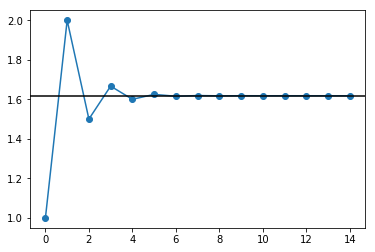

In [10]:
from pylab import *
plot(phi[1:], 'o-')
axhline(1.618, color='black')
axis((0, 15, 1-))
show()

Vi ser at beregningen av $\phi$ konvergerer veldig raskt, mye raskere enn den vi gjorde for $\pi$.